In [55]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# Question 1

In [56]:
Catalyst1=pd.Series([91.5,94.18,92.18,95.39,91.79,89.07,94.72,89.21],name="Catalyst1")
Catalyst2=pd.Series([89.19,80.95,80.46,93.21,87.19,87.04,81.07,92.75],name="Catalyst2")

In [57]:
df=Catalyst1
df=pd.concat([df,Catalyst2],axis="columns")
df

,Catalyst1,Catalyst2
0,91.50,89.19
1,94.18,80.95
2,92.18,80.46
3,95.39,93.21
4,91.79,87.19
5,89.07,87.04
6,94.72,81.07
7,89.21,92.75


In [58]:
df.describe()

,Catalyst1,Catalyst2
count,8.000000,8.000000
mean,92.255000,86.482500
std,2.385019,5.194186
min,89.070000,80.460000
25%,90.927500,81.040000
50%,91.985000,87.115000
75%,94.315000,90.080000
max,95.390000,93.210000


What test do you want to run?  What is the statistic of interest?  What is the appropriate test?

Can you assume randomly and identically distributed: independent samples within and between groups

2 sample independent t-test (Student's t-test)

difference in the means of 2 samples

Need to review and defend the assumptions of the test.

Assumptions include
- independence of samples and random sampling
- normality of both samples
- and equality af variance

These are supported by the Shapiro-Wilks test of normality having non-significant p-values (thereby failing to reject the null of normal distribution). 

For the Shapiro Wilk’s test:  The null hypothesis is that the distribution is normal (H0: normal; HA: not normal).  When you run the Shapiro Wilk’s test, you find a p-value that either supports rejecting the null hypothesis (if alpha =0.05, then when p<= 0.05 you reject the null hypothesis and accept the alternative hypothesis) or failing to reject the null hypothesis (when p>0.05 you fail to reject the null hypothesis).  So when the Shapiro Wilks test is p>0.05, we fail to reject the null hypothesis that the distribution is normal and state that the distribution is normal.  

In [59]:
stats.shapiro(Catalyst1)

ShapiroResult(statistic=0.9217145442962646, pvalue=0.4439299404621124)

In [60]:
stats.shapiro(Catalyst2)

ShapiroResult(statistic=0.8780398964881897, pvalue=0.18035751581192017)

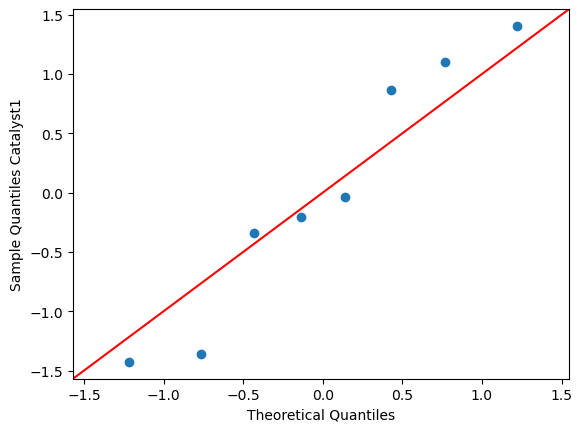

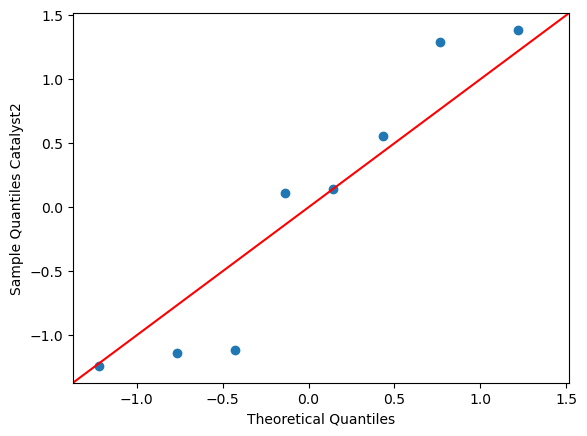

In [61]:
import statsmodels.api as sm
#import statsmodels as sm
Catalyst1.sort_values()
Catalyst2.sort_values()
sm.qqplot(Catalyst1,line='45',fit=True)
plt.ylabel("Sample Quantiles Catalyst1")
sm.qqplot(Catalyst2,line='45',fit=True)
plt.ylabel("Sample Quantiles Catalyst2")
plt.show()

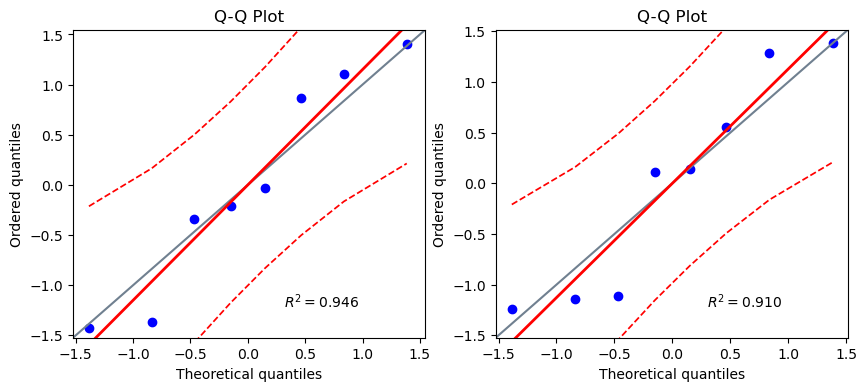

In [62]:
# with 95%CI
import pingouin as pg
figA,axA=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
pg.qqplot(Catalyst1,dist='norm',ax=axA[0])
pg.qqplot(Catalyst2,dist='norm',ax=axA[1])
plt.show()

and the Levene's test having non-significnat p-value (thereby failing to reject the null of equal variance). 

Similarly, for the Levene’s test: the null hypothesis is that the two distributions are equivalent (H0: variances equivalent; HA: variances unequal).  When you run a Levene’s test, you find a p-value that either supports rejecting the null hypothesis (if alpha =0.05, then when p<=0.05 you reject the null hypothesis and accept the alternative hypothesis) or failing to reject the null hypothesis (when p>0.05 you fail to reject the null hypothesis).  So when the Levene’s test is p>0.05, we fail to reject the null hypothesis that the variances are equivalent and state that the variances are equivalent.   

As short hand you can look at the ratio of the standard deviations and make a judgement if they are equivalent or not.

As a rule of thumb, if the ratio of the larger variance to the smaller variance is less than 4 then we can assume the variances are approximately equal and use the Student’s t-test.

In [63]:
stats.levene(Catalyst1,Catalyst2)

LeveneResult(statistic=4.010441956225402, pvalue=0.06497813783011223)

In [64]:
std2=np.std(Catalyst2,ddof=1)
std2

5.19418562295518

In [65]:
std1=np.std(Catalyst1,ddof=1)
std1

2.385018718105646

In [66]:
std2/std1

2.177838514861123

What is the alpha value?

Is it a one-side or two-side test?

What is the null and alternative hypothesis?

In [67]:
stats.ttest_ind(Catalyst1,Catalyst2,equal_var=True)

Ttest_indResult(statistic=2.856593665268584, pvalue=0.012683869002415266)

Run the t-test

The null hypothesis is that the 2 groups have equal means:
$\mu$1 = $\mu2$

and the alternative hypothesis is that they have different means (for  a two-sided test).  

The level of significance is alpha = 0.05  
Calculate the test statistic using a pooled standard deviation.  
Compare this to the critical t value at n1+n2-2 and alpha = 0.05.  
Find the p-value for the test statistic. 
Make a conclusion.  

In [68]:
diffinmeans=Catalyst1.mean()-Catalyst2.mean()
diffinmeans

5.772500000000022

In [69]:
len1=len(Catalyst1)
len2=len(Catalyst2)

In [70]:
std1**2

5.688314285714299

In [71]:
s_pooled_squared=( ( ((len1-1)*(std1**2)) + ((len2-1)*(std2**2)) ) / (len1+len2-2) )
s_pooled=np.sqrt(s_pooled_squared)
print("The pooled standard deviation of the samples is:  "+str(s_pooled))

The pooled standard deviation of the samples is:  4.041526850797146


In [72]:
StandErrorDiff=( s_pooled*(np.sqrt(1/len1+1/len2)) )
print("The standard error of the difference is: "+str(StandErrorDiff))

The standard error of the difference is: 2.020763425398573


In [73]:
#compute the test statistic
t_statistic=(diffinmeans / StandErrorDiff)
t_statistic

2.856593665268591

What is the critical value for this test?

In [74]:
# Find the critical value
Critical_t=stats.t.ppf(0.975,(len1+len2-2))
print(Critical_t)

2.1447866879169273


What is the p-value for this test?

In [75]:
1-(stats.t.cdf(t_statistic,(len1+len2-2)))

0.006341934501207569

In [76]:
# calculate the p-value
2*(1-stats.t.cdf(t_statistic,(len1+len2-2)))

0.012683869002415138

# 95% CI of the difference between the means

In [77]:
LB=(diffinmeans) - Critical_t*s_pooled* (np.sqrt(1/len1 + 1/len2))
UB=(diffinmeans) + Critical_t*s_pooled* (np.sqrt(1/len1 + 1/len2))
print(LB)
print(UB)

1.4383935057757524
10.106606494224291


In [78]:
# Check with python
import statsmodels.api as sm
import statsmodels as sm
CI_t=sm.stats.weightstats._tconfint_generic(diffinmeans,StandErrorDiff,(len1+len2-2),0.05,alternative='two-sided')
CI_t

(1.4383935057757524, 10.106606494224291)

What would happen if you made the confidence level smaller?

The 90% CI is narrower because you have less confidence that your interval covers the true mean.  The margin of error decreases and narrows the CI because you are increasing the alpha signifincace level which decreases the critical value at a set dof.

In [79]:
CI_tA=sm.stats.weightstats._tconfint_generic(diffinmeans,StandErrorDiff,(len1+len2-2),0.1,alternative='two-sided')
CI_tA

(2.213308896842398, 9.331691103157645)

In [80]:
# Find the critical value at 0.1
Critical_tA=stats.t.ppf(0.95,(len1+len2-2))
print(Critical_tA)

1.7613101357748562


In [48]:
1-norm.cdf(2.52)

0.005867741715332553